In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
data_ori = pd.read_excel(r"C:\Users\tunag\Desktop\宏观数据\中国的国内总储蓄_国民总收入对比结果.xlsx")

<AxesSubplot:xlabel='saving', ylabel='gdp'>

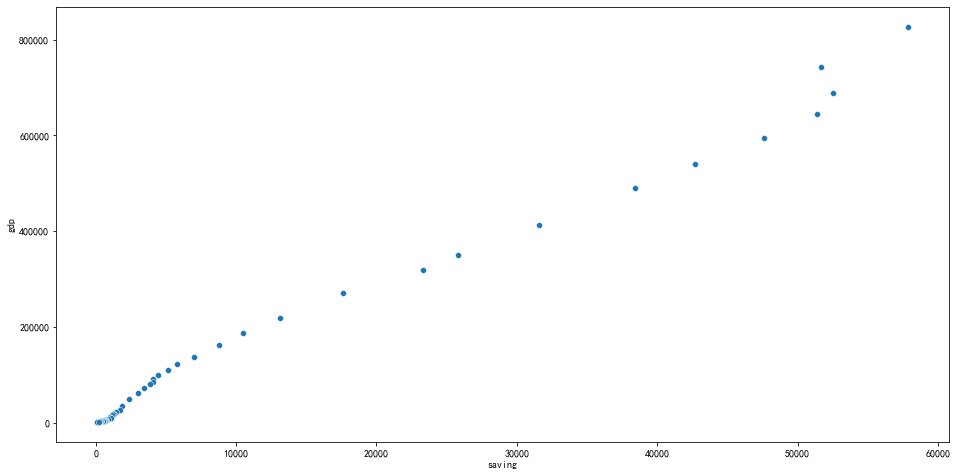

In [97]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = data_ori,x = 'saving', y = 'gdp')

# 一元回归

## scipy 

In [98]:
import scipy.stats as st

In [99]:
y_1 = data_ori.saving
x_1 = data_ori.gdp

In [100]:
slope, intercept, r_value, p_value, std_err = st.linregress(x_1, y_1)

print(slope)# 输出斜率
print(intercept) # 输出截距
print(r_value**2) # 输出 r^2

0.07454353915225431
-479.09915359592196
0.9896864113170208


In [101]:
y_1_fit = slope*x_1 + intercept

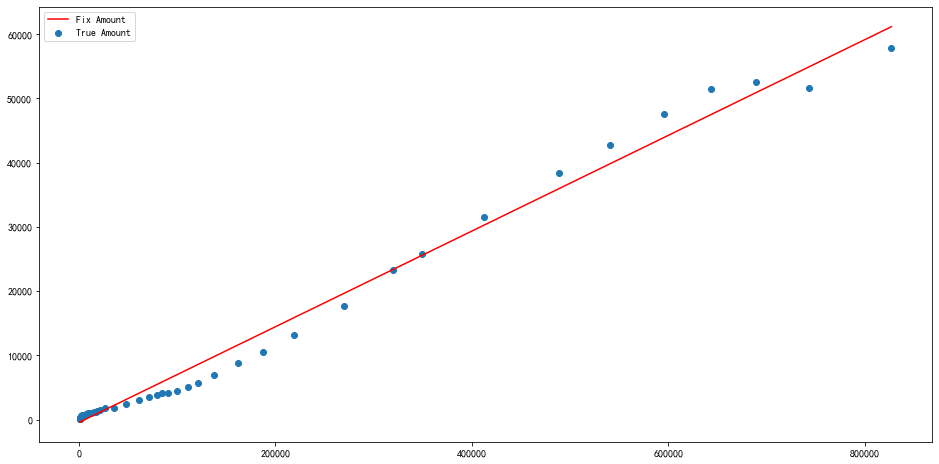

In [102]:
plt.figure(figsize=(16,8))
plt.scatter(x_1, y_1,label = 'True Amount')
plt.plot(x_1, y_1_fit, color = 'RED', label = 'Fix Amount')
plt.legend()


## statsmodels

In [103]:
import statsmodels.api as sm

In [105]:
y_2 = data_ori.loc[:,'saving']
x_2 = sm.add_constant(data_ori.loc[:,'gdp'])

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [106]:
model = sm.OLS(y_2,x_2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 saving   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5374.
Date:                Sun, 15 May 2022   Prob (F-statistic):           2.53e-57
Time:                        14:49:47   Log-Likelihood:                -511.57
No. Observations:                  58   AIC:                             1027.
Df Residuals:                      56   BIC:                             1031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -479.0992    256.227     -1.870      0.0

In [107]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

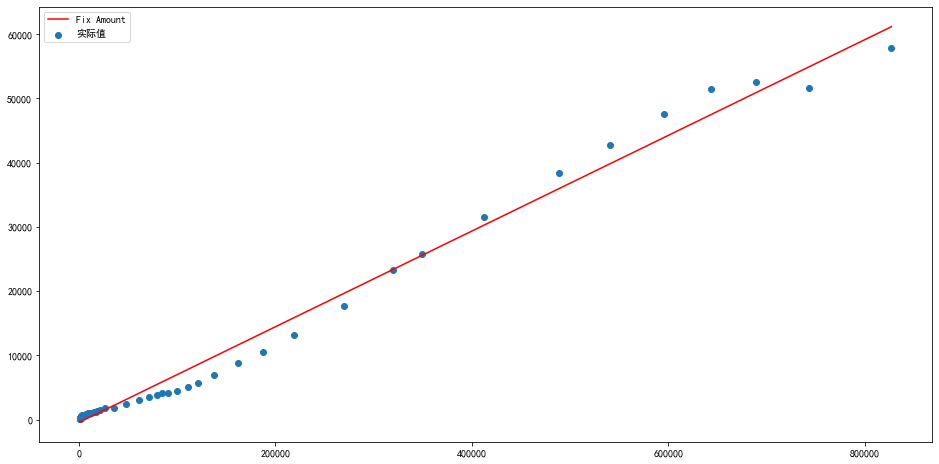

In [108]:
y_2 = data_ori.iloc[:,1]
x_2 = data_ori.iloc[:,2]

plt.figure(figsize=(16,8))
plt.scatter(x_2, y_2, label='实际值')

predicts = model.predict()
plt.plot(x_2, predicts, color = 'red', label='Fix Amount')
plt.legend() 
plt.show()

## sklearn

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
y_3 = data_ori.loc[:,'saving']
x_3 = data_ori.loc[:,'gdp']

In [111]:
x_3 = x_3[:, np.newaxis]
y_3 = y_3[:, np.newaxis]

C:\Users\tunag\AppData\Local\Temp/ipykernel_2984/4276843912.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_3 = x_3[:, np.newaxis]
C:\Users\tunag\AppData\Local\Temp/ipykernel_2984/4276843912.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_3 = y_3[:, np.newaxis]


In [112]:
model = LinearRegression() # 构建线性模型
model.fit(x_3, y_3) # 自变量在前，因变量在后
predicts = model.predict(x_3) # Fix Amount
R2 = model.score(x_3, y_3) # 拟合程度 R2
print('R2 = %.2f' % R2) # 输出 R2
coef = model.coef_ # 斜率
intercept = model.intercept_ # 截距
print(model.coef_, model.intercept_) # 输出斜率和截距

R2 = 0.99
[[0.07454354]] [-479.0991536]


In [113]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

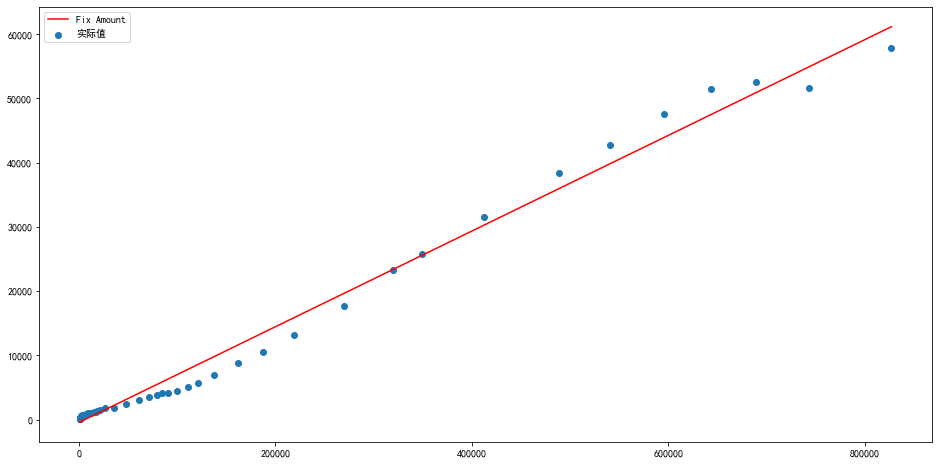

In [114]:
y_3 = data_ori.iloc[:,1]
x_3 = data_ori.iloc[:,2]

plt.figure(figsize=(16,8))
plt.scatter(x_3, y_3, label='实际值')


plt.plot(x_3, predicts, color = 'red', label='Fix Amount')
plt.legend() 
plt.show()